PermissionError: [Errno 1] Operation not permitted: 'figure_5b2_with_boundary.svg'

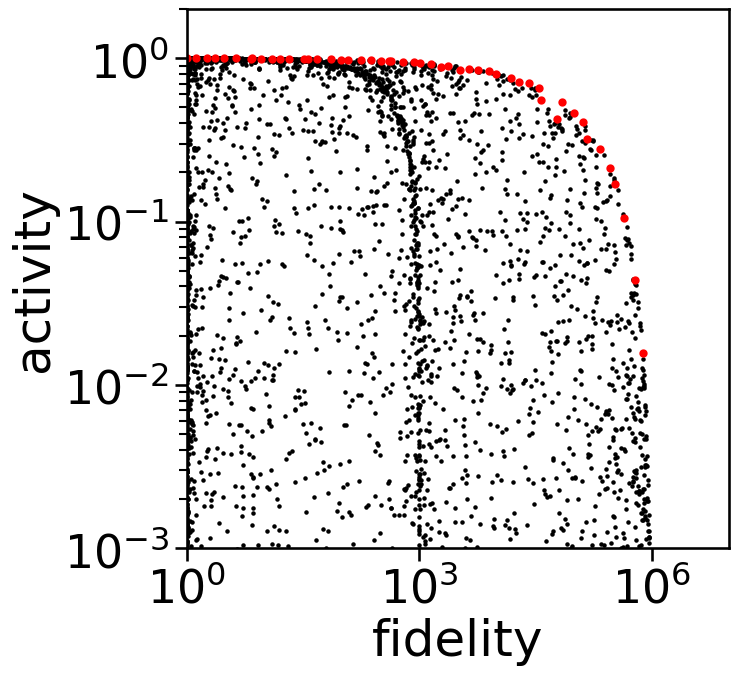

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def tradeoff_func(kvec, koff_r2w):
    kon, koff, kp, kcat = kvec
    koffw = koff * koff_r2w
    # Existing terms
    activity = kon * kp / ((koff + kon) * (koff + kp) + kcat * (koff + kon + kp))
    activity_flux = activity * kcat
    fidelity = ((koffw + kon) * (koffw + kp) + kcat * (koffw + kon + kp)) / ((koff + kon) * (koff + kp) + kcat * (koff + kon + kp))
    fidelity_normalized = fidelity / koff_r2w**2
    
    # Define activity_ER_EW (temp in the figure)
    term1 = 1
    term2 = (kcat + koffw) / kp
    term3 = ((kcat + koffw) * (koffw + kp)) / (kon * kp)
    term4 = ((kcat + koffw) * (koffw + kp)) / (kp * (koff + kp))
    term5 = ((kcat + koffw) * (koffw + kp)) / ((kcat + koff) * (koff + kp))
    sum_ER_EW = term1 + term2 + term3 + term4 + term5
    
    # Define fidelity_ER_EW (eta in the figure)
    numerator = (kcat + koffw) * (koffw + kp)
    denominator = (kcat + koff) * (koff + kp) * sum_ER_EW
    activity_ER_EW = numerator / denominator
    fidelity_ER_EW = (kcat + koffw) * (koffw + kp) /((kcat + koff) * (koff + kp))
    
    return [activity, fidelity, activity_flux, fidelity_normalized, activity_ER_EW, fidelity_ER_EW]

# Simulation parameters
n_pts = 10000
min_log10 = -6
max_log10 = 6
n_dim = 4  # kon, koff, kp, kcat
koff_r2w = 1e3  # koffw = koff * koff_r2w
kk = 10**(np.random.rand(n_pts, n_dim) * (max_log10 - min_log10) + min_log10)

# Compute results
result = np.zeros((n_pts, 6))
for i in range(n_pts):
    kvec = kk[i, :]
    result[i] = tradeoff_func(kvec, koff_r2w)

# Extract activity and fidelity
activity = result[:, 0]
fidelity = result[:, 1]

# Identify upper boundary using binning
n_bins = 50  # Number of bins for fidelity
fidelity_log = np.log10(fidelity)
bin_edges = np.linspace(min(fidelity_log), max(fidelity_log), n_bins + 1)
bin_indices = np.digitize(fidelity_log, bin_edges)

# Store boundary points
boundary_params = []
boundary_points = []

for i in range(1, n_bins + 1):
    mask = bin_indices == i
    if np.any(mask):
        bin_activity = activity[mask]
        bin_fidelity = fidelity[mask]
        bin_params = kk[mask, :]
        # Find index of maximum activity in this bin
        max_activity_idx = np.argmax(bin_activity)
        boundary_points.append([bin_fidelity[max_activity_idx], bin_activity[max_activity_idx]])
        boundary_params.append(bin_params[max_activity_idx, :])

# Convert to arrays
boundary_points = np.array(boundary_points)
boundary_params = np.array(boundary_params)

# Plotting
sns.set_context('talk', font_scale=2, rc={'lines.linewidth': 3})
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
ax.scatter(fidelity, activity, s=3, color='k', label='All points')
ax.scatter(boundary_points[:, 0], boundary_points[:, 1], s=20, color='r', label='Boundary points')
ax.set_ylabel(r'activity')
ax.set_xlabel(r'fidelity')
ax.set_ylim([1e-3, 2])
ax.set_xlim([1, 1e7])
ax.set_xscale('log')
ax.set_yscale('log')
#ax.legend()

plt.savefig('figure_5b2_with_boundary.svg', bbox_inches='tight', transparent=True)
plt.show()

# Save boundary parameters to a file
np.savetxt('boundary_parameters.txt', boundary_params, header='kon koff kp kcat', fmt='%.6e')
print("Boundary parameters saved to 'boundary_parameters.txt'")

In [ ]:
factor_1 = []
for params in boundary_params:
    kon, koff, kp, kcat = params
    koffw = koff * koff_r2w
    # Calculate factor_1 = kcat * koff / koffw * (koff + kon + kp + koff / koffw)
    term1 = kcat * (koff / koffw)  # = kcat / koff_r2w
    term2 = koff + kon + kp + (koff / koffw)  # = koff + kon + kp + 1 / koff_r2w
    factor_1.append(term1 * term2)
factor_1 = np.array(factor_1)
print(factor_1)

/var/folders/fd/b1g1fr5n7xv98s13rfl1ncyw0000gn/T/ipykernel_58551/2831416101.py:6: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax.set_yscale('log')  # Use log scale if factor_1 spans wide range


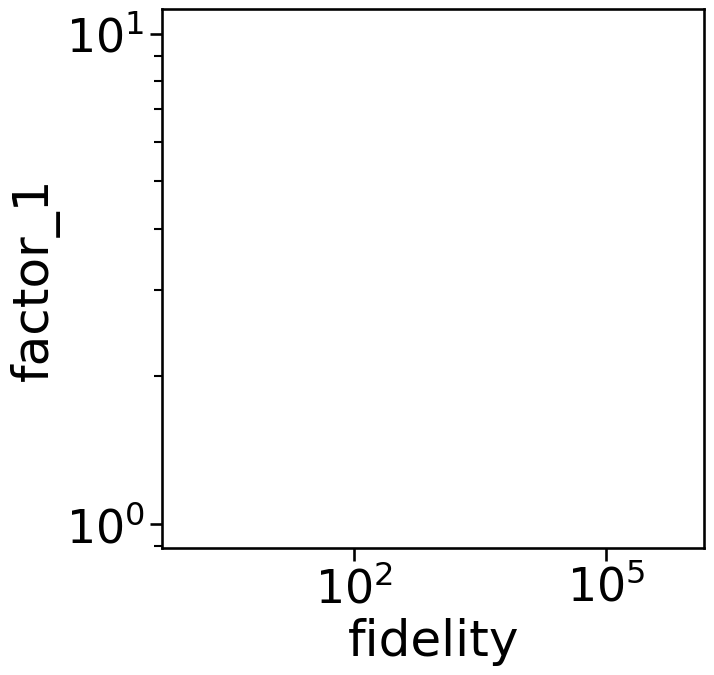

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
ax.scatter(boundary_points[:, 0], factor_1, s=20, color='b')
ax.set_xlabel(r'fidelity')
ax.set_ylabel(r'factor_1')
ax.set_xscale('log')
ax.set_yscale('log')  # Use log scale if factor_1 spans wide range
plt.savefig('factor_1_vs_fidelity.svg', bbox_inches='tight', transparent=True)
plt.show()

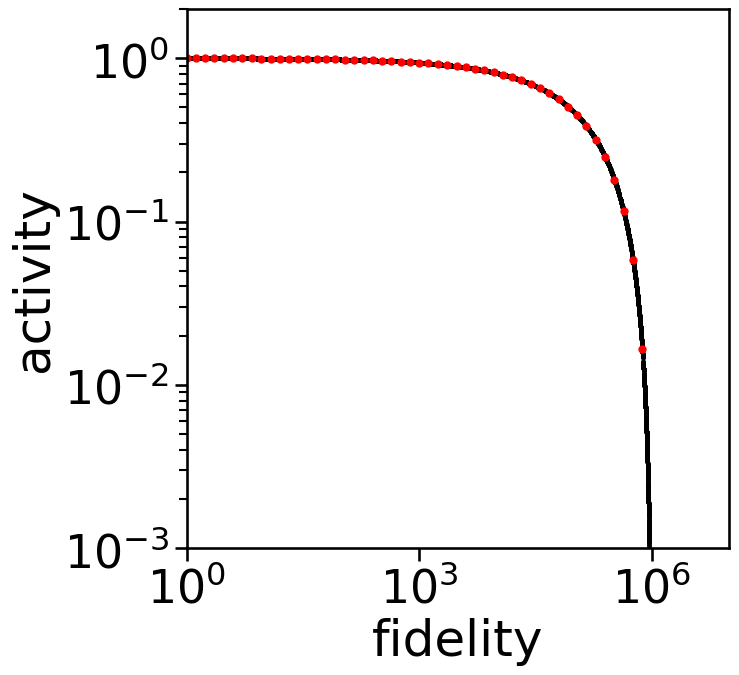

In [ ]:
# make kon = kp
kk[:,0]=kk[:,2]
kk[:,3]=0
# Compute results
result = np.zeros((n_pts, 6))
for i in range(n_pts):
    kvec = kk[i, :]
    result[i] = tradeoff_func(kvec, koff_r2w)

# Extract activity and fidelity
activity = result[:, 0]
fidelity = result[:, 1]

# Identify upper boundary using binning
n_bins = 50  # Number of bins for fidelity
fidelity_log = np.log10(fidelity)
bin_edges = np.linspace(min(fidelity_log), max(fidelity_log), n_bins + 1)
bin_indices = np.digitize(fidelity_log, bin_edges)

# Store boundary points
boundary_params = []
boundary_points = []

for i in range(1, n_bins + 1):
    mask = bin_indices == i
    if np.any(mask):
        bin_activity = activity[mask]
        bin_fidelity = fidelity[mask]
        bin_params = kk[mask, :]
        # Find index of maximum activity in this bin
        max_activity_idx = np.argmax(bin_activity)
        boundary_points.append([bin_fidelity[max_activity_idx], bin_activity[max_activity_idx]])
        boundary_params.append(bin_params[max_activity_idx, :])

# Convert to arrays
boundary_points = np.array(boundary_points)
boundary_params = np.array(boundary_params)

# Plotting
sns.set_context('talk', font_scale=2, rc={'lines.linewidth': 3})
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
ax.scatter(fidelity, activity, s=3, color='k', label='All points')
ax.scatter(boundary_points[:, 0], boundary_points[:, 1], s=20, color='r', label='Boundary points')
ax.set_ylabel(r'activity')
ax.set_xlabel(r'fidelity')
ax.set_ylim([1e-3, 2])
ax.set_xlim([1, 1e7])
ax.set_xscale('log')
ax.set_yscale('log')
#ax.legend()

# Save and show the figure
plt.savefig('figure_5b2_with_boundary_kon_kp.svg', bbox_inches='tight', transparent=True)

In [ ]:
# make kon = kp
kk[:,0]=kk[:,2]

# Compute results
result = np.zeros((n_pts, 6))
for i in range(n_pts):
    kvec = kk[i, :]
    result[i] = tradeoff_func(kvec, koff_r2w)

# Extract activity and fidelity
activity = result[:, 0]
fidelity = result[:, 1]

# Identify upper boundary using binning
n_bins = 50  # Number of bins for fidelity
fidelity_log = np.log10(fidelity)
bin_edges = np.linspace(min(fidelity_log), max(fidelity_log), n_bins + 1)
bin_indices = np.digitize(fidelity_log, bin_edges)

# Store boundary points
boundary_params = []
boundary_points = []

for i in range(1, n_bins + 1):
    mask = bin_indices == i
    if np.any(mask):
        bin_activity = activity[mask]
        bin_fidelity = fidelity[mask]
        bin_params = kk[mask, :]
        # Find index of maximum activity in this bin
        max_activity_idx = np.argmax(bin_activity)
        boundary_points.append([bin_fidelity[max_activity_idx], bin_activity[max_activity_idx]])
        boundary_params.append(bin_params[max_activity_idx, :])

# Convert to arrays
boundary_points = np.array(boundary_points)
boundary_params = np.array(boundary_params)

# Plotting
sns.set_context('talk', font_scale=2, rc={'lines.linewidth': 3})
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
ax.scatter(fidelity, activity, s=3, color='k', label='All points')
ax.scatter(boundary_points[:, 0], boundary_points[:, 1], s=20, color='r', label='Boundary points')
ax.set_ylabel(r'activity')
ax.set_xlabel(r'fidelity')
ax.set_ylim([1e-3, 2])
ax.set_xlim([1, 1e7])
ax.set_xscale('log')
ax.set_yscale('log')
#ax.legend()

# Save and show the figure
plt.savefig('figure_5b2_with_boundary_kon_kp.svg', bbox_inches='tight', transparent=True)

